# Analysis for David Ledden

## Imports, data loading & harmonization

In [1]:
# Include in the environment the code directory with the utils function
import sys
sys.path.append('../../../code/')

In [2]:
# Library imports
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

# Utils imports
import cohort_analysis_utils as utils

In [3]:
# Remove warnings for readability
import warnings
warnings.filterwarnings('ignore')

# Remove cell printing limits
pd.set_option('display.max_rows', None)

In [4]:
df_120 = pd.read_csv('../../../data/ruo_vs_mmk_20240723.csv' , sep='\t', index_col=0, header=0)

# Harmonization of column names
df_120 = utils.normalize_column_names(df_120)

# Ensure numeric columns are treated as such
cols_120_to_num = ['Collected_volume_mL', 'pH',
                    'MMP9_RUO', 'HSPB1_RUO', 'PERM_RUO',
                    'MMP9_MMK', 'HSPB1_MMK', 'AGRIN_MMK',
                    'KPYM_MMK', 'PERM_MMK', 'Total_protein_UCFP',
                    'Total_protein_BCA']
df_120 = utils.cols_as_numbers(df_120, cols_120_to_num)

# Ensure categorical columns are treated as such
df_120 = utils.cols_as_category(df_120, {'Pathology':{'Benign': 0, 'Endometrial cancer': 1}})

## Model computing (60 x 60)

In [5]:
PLOT_ROCS = True
MAX_BIOMARKER_COUNT = 1
RESULTS_PATH = './results/60x60'

# Columns to be considered as biomarkers
BIOMARKERS_120 = ['MMP9_RUO', 'HSPB1_RUO', 'PERM_RUO', 'MMP9_MMK', 'HSPB1_MMK', 'AGRIN_MMK', 'KPYM_MMK', 'PERM_MMK']

NORMALIZING_COL_120 = 'Total_protein_BCA' # Column to be used for normalizing the biomarkers
VOLUME_COL = 'Collected_volume_mL' # Column to be used as volume for scatters and undoing the dilution

METHODS = ['direct', 'normalized', 'kronmal', 'undo_dilution']

In [6]:
models_120_1 = utils.compute_all_models_and_save(
                            df=df_120,
                            biomarkers=BIOMARKERS_120,
                            normalizing_col=NORMALIZING_COL_120, 
                            volume_col= VOLUME_COL,
                            volume_added=0.5,
                            apply_log=True,
                            avoid_same_biomarker=True,
                            methods=METHODS,
                            max_biomarker_count=MAX_BIOMARKER_COUNT,
                            folder_name=RESULTS_PATH,
                            plot_rocs=PLOT_ROCS,
                            compute_auc_ci=True
                            )

# Models performance (60x60)

## Direct

In [21]:
pd.read_csv(f'{RESULTS_PATH}/direct/max_1.csv', sep=',', index_col=0, header=0).sort_values(by='AUC', ascending=False)

,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,
AGRIN_MMK,0.83556,0.66667,0.83333,0.71429,0.80000,0.57576
PERM_RUO,0.83322,0.88462,0.74545,0.87234,0.76667,0.55556
MMP9_MMK,0.82611,0.70000,0.86667,0.74286,0.84000,0.59596
PERM_MMK,0.81925,0.84483,0.66667,0.81633,0.71014,0.55556
MMP9_RUO,0.81404,0.83333,0.70175,0.80000,0.74627,0.57576
KPYM_MMK,0.78588,0.71186,0.66667,0.70175,0.67742,0.56566
HSPB1_MMK,0.76384,0.85000,0.47458,0.75676,0.62195,0.54545
HSPB1_RUO,0.68242,0.70000,0.58182,0.64000,0.64615,0.56566


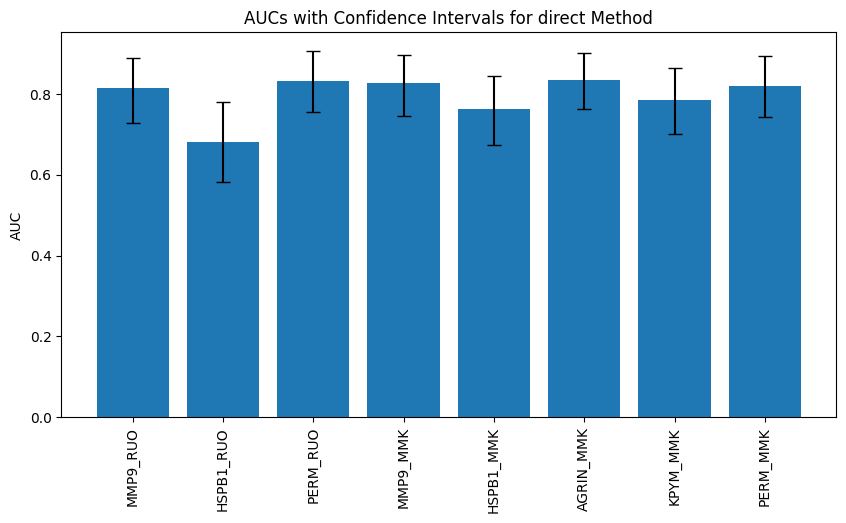

In [52]:
utils.plot_aucs_with_confidence_intervals(models_120_1, 'direct')

## Normalized

In [22]:
pd.read_csv(f'{RESULTS_PATH}/normalized/max_1.csv', sep=',', index_col=0, header=0).sort_values(by='AUC', ascending=False)

,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,
AGRIN_MMK,0.80361,0.55000,0.91667,0.67073,0.86842,0.56566
KPYM_MMK,0.72881,0.67797,0.71667,0.69355,0.70175,0.55556
MMP9_RUO,0.71111,0.66667,0.64912,0.64912,0.66667,0.56566
MMP9_MMK,0.70500,0.88333,0.48333,0.80556,0.63095,0.54545
PERM_MMK,0.68908,0.70690,0.60000,0.67925,0.63077,0.53535
PERM_RUO,0.68392,0.69231,0.61818,0.68000,0.63158,0.53535
HSPB1_MMK,0.67373,0.58333,0.69492,0.62121,0.66038,0.53535
HSPB1_RUO,0.62455,0.41667,0.90909,0.58824,0.83333,0.55556


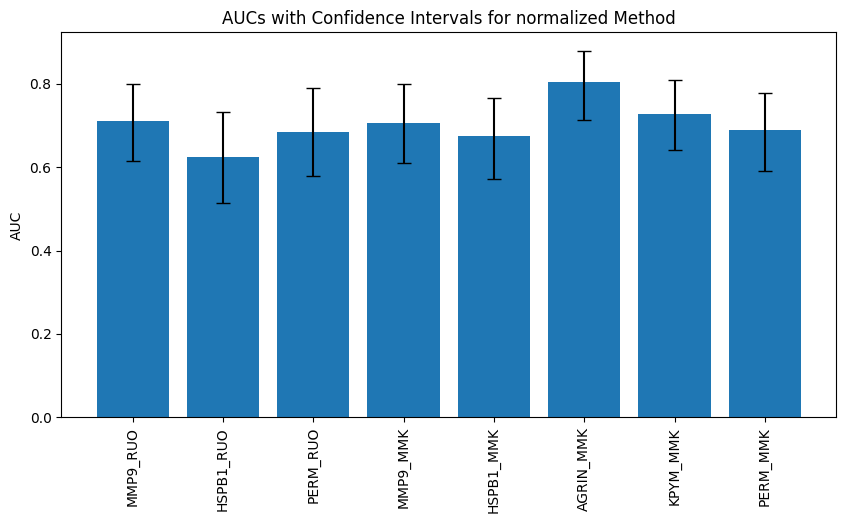

In [51]:
utils.plot_aucs_with_confidence_intervals(models_120_1, 'normalized')

## Kronmal

In [23]:
pd.read_csv(f'{RESULTS_PATH}/kronmal/max_1.csv', sep=',', index_col=0, header=0).sort_values(by='AUC', ascending=False)

,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,
PERM_MMK,0.81494,0.84483,0.71667,0.82692,0.74242,0.55556
PERM_RUO,0.80175,0.82692,0.65455,0.80000,0.69355,0.55556
AGRIN_MMK,0.73639,0.51667,0.91667,0.65476,0.86111,0.58586
MMP9_RUO,0.72749,0.70000,0.63158,0.66667,0.66667,0.57576
KPYM_MMK,0.70169,0.59322,0.73333,0.64706,0.68627,0.57576
MMP9_MMK,0.68889,0.88333,0.41667,0.78125,0.60227,0.53535
HSPB1_RUO,0.64727,0.70000,0.58182,0.64000,0.64615,0.56566
HSPB1_MMK,0.60763,0.51667,0.74576,0.60274,0.67391,0.56566


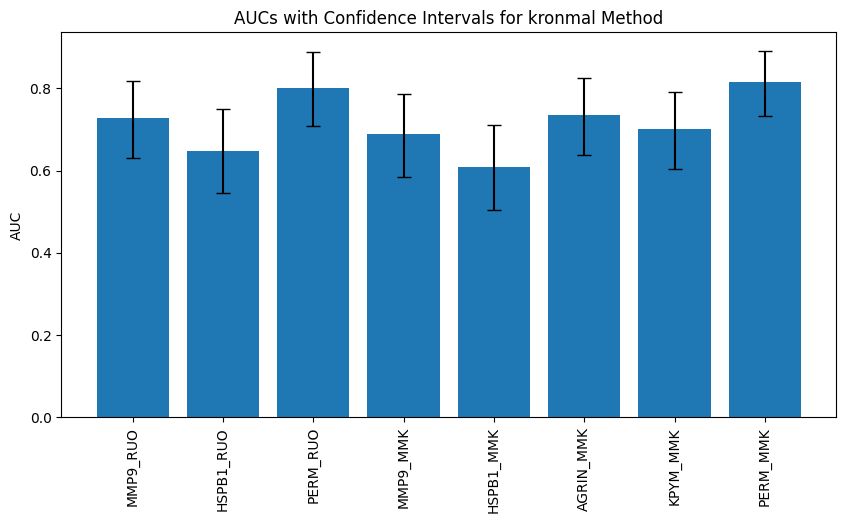

In [50]:
utils.plot_aucs_with_confidence_intervals(models_120_1, 'kronmal')

## Undo dilution

In [24]:
pd.read_csv(f'{RESULTS_PATH}/undo_dilution/max_1.csv', sep=',', index_col=0, header=0).sort_values(by='AUC', ascending=False)

,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,
PERM_RUO,0.86538,0.92000,0.73077,0.90476,0.76667,0.59596
PERM_MMK,0.85077,0.82143,0.82143,0.82143,0.82143,0.60606
AGRIN_MMK,0.84883,0.72414,0.82143,0.74194,0.80769,0.62626
MMP9_MMK,0.84575,0.70690,0.87500,0.74242,0.85417,0.64646
MMP9_RUO,0.82856,0.75862,0.84906,0.76271,0.84615,0.62626
KPYM_MMK,0.81955,0.85965,0.73214,0.83673,0.76562,0.59596
HSPB1_MMK,0.81129,0.84483,0.67273,0.80435,0.73134,0.57576
HSPB1_RUO,0.73901,0.84483,0.54902,0.75676,0.68056,0.58586


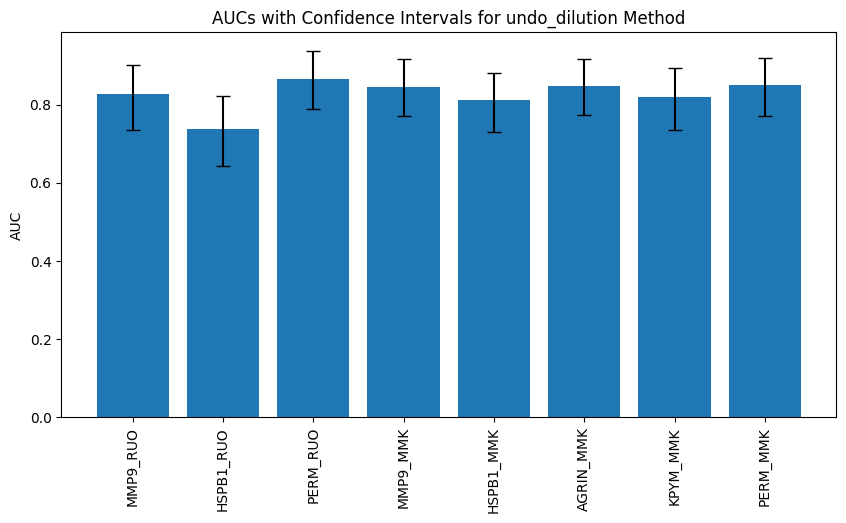

In [49]:
utils.plot_aucs_with_confidence_intervals(models_120_1, 'undo_dilution')

## RUO vs MMK DIRECT (60 x 60)

### MMP9

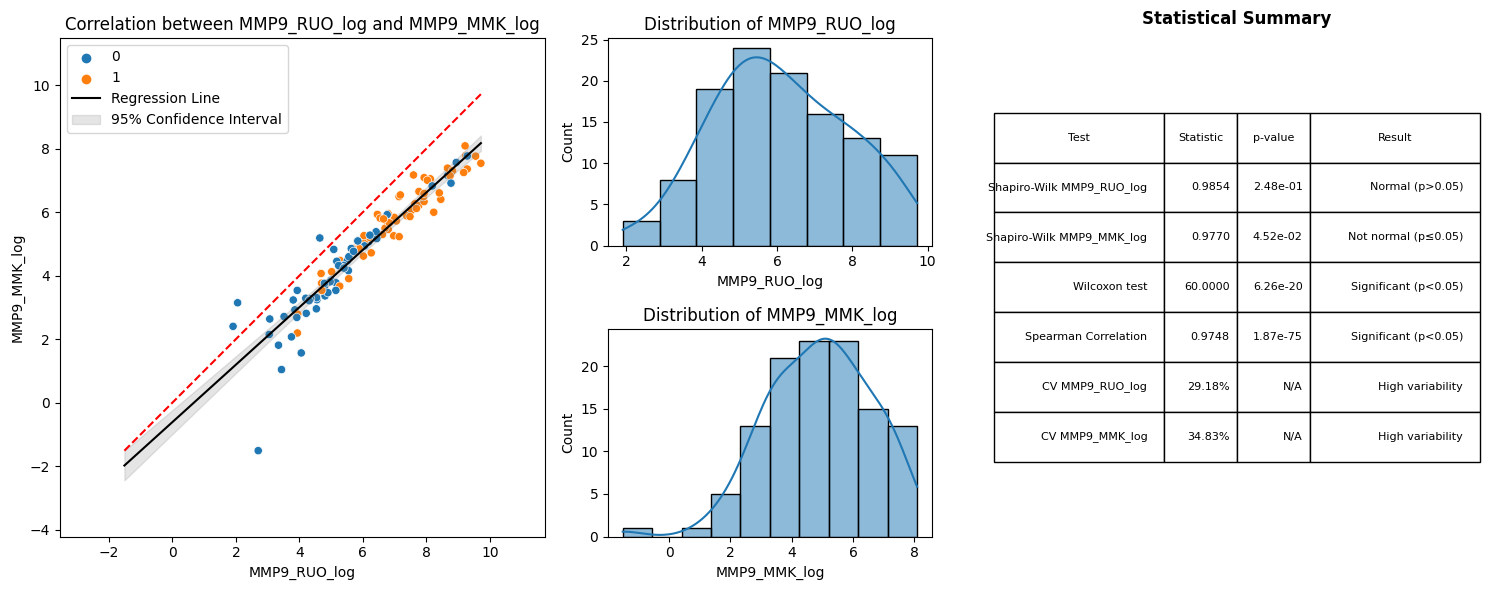

In [14]:
df_120['MMP9_RUO_log'] = np.log(df_120['MMP9_RUO'])
df_120['MMP9_MMK_log'] = np.log(df_120['MMP9_MMK'])

# dropna and inf values for the norm_log columns
df_120 = df_120.replace([np.inf, -np.inf], np.nan)
utils.plot_biomarker_correlation(df_120.dropna(subset=['MMP9_RUO_log', 'MMP9_MMK_log']), "MMP9_RUO_log", "MMP9_MMK_log")

### PERM

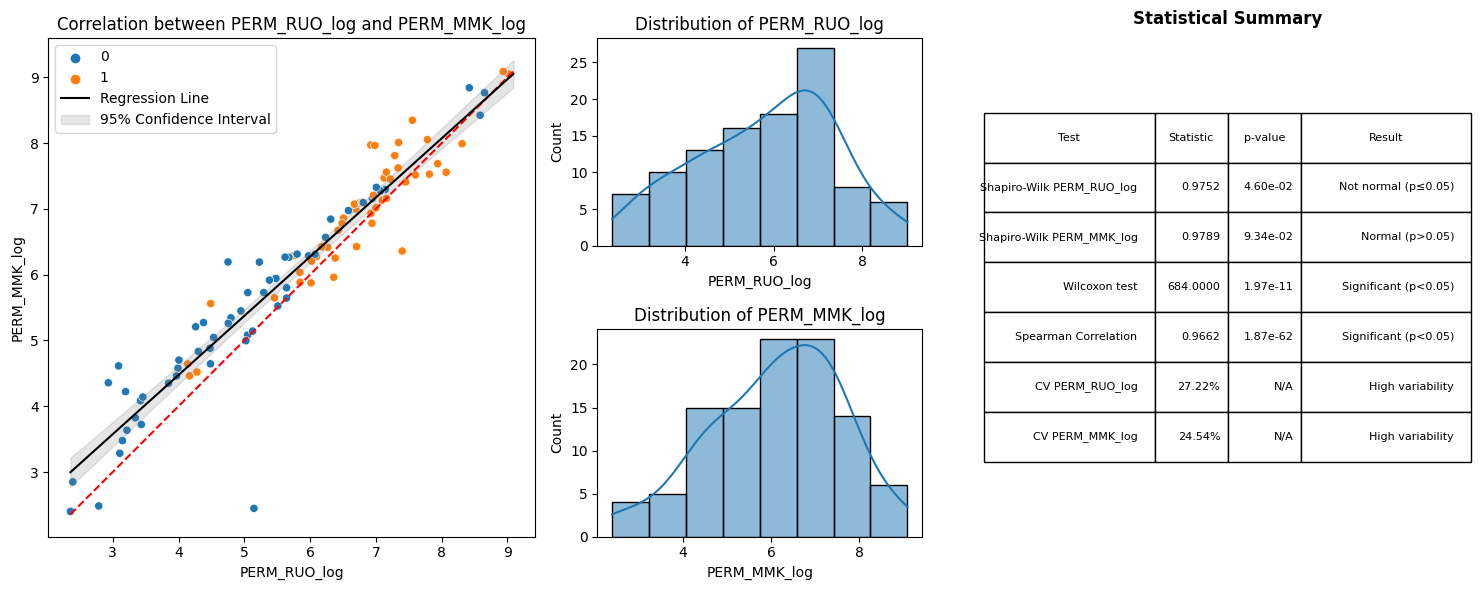

In [15]:
df_120['PERM_RUO_log'] = np.log(df_120['PERM_RUO'])
df_120['PERM_MMK_log'] = np.log(df_120['PERM_MMK'])

# dropna and inf values for the norm_log columns
df_120 = df_120.replace([np.inf, -np.inf], np.nan)
utils.plot_biomarker_correlation(df_120.dropna(subset=['PERM_RUO_log', 'PERM_MMK_log']), "PERM_RUO_log", "PERM_MMK_log")

# HSPB1

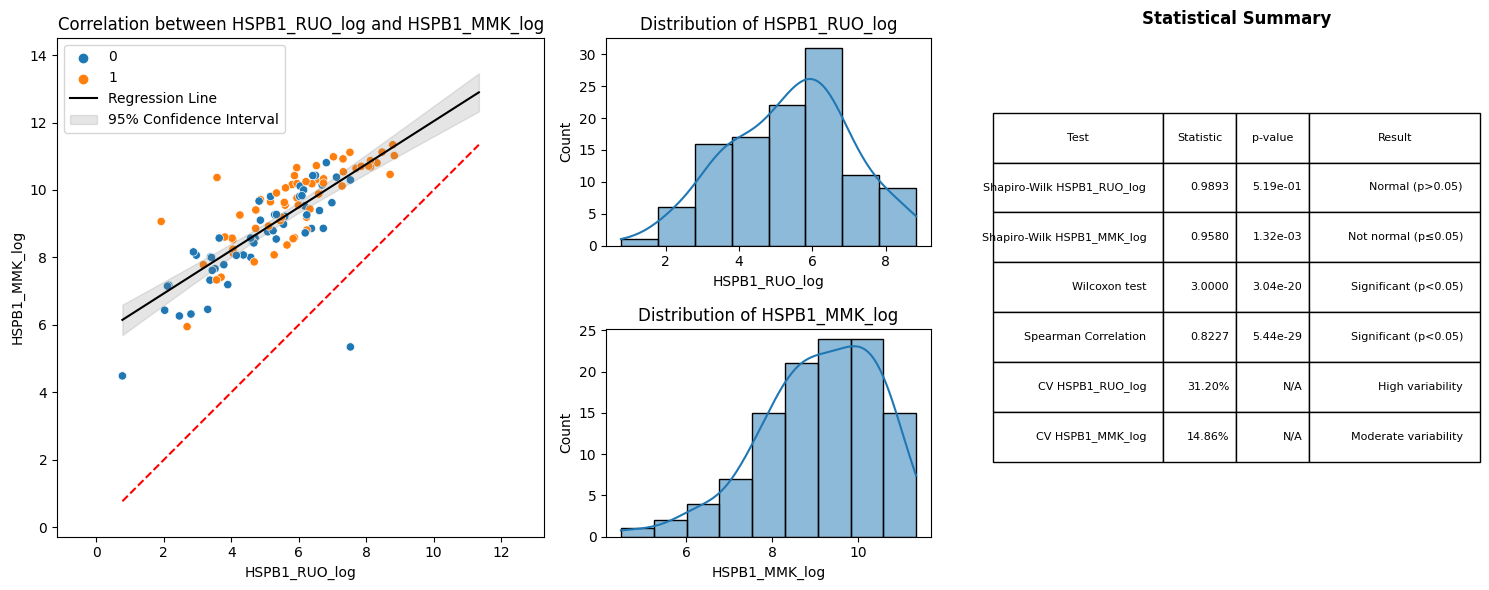

In [16]:
df_120['HSPB1_RUO_log'] = np.log(df_120['HSPB1_RUO'])
df_120['HSPB1_MMK_log'] = np.log(df_120['HSPB1_MMK'])

# dropna and inf values for the norm_log columns
df_120 = df_120.replace([np.inf, -np.inf], np.nan)
utils.plot_biomarker_correlation(df_120.dropna(subset=['HSPB1_RUO_log', 'HSPB1_MMK_log']), "HSPB1_RUO_log", "HSPB1_MMK_log")

## RUO vs MMK NORMALIZED (60 x 60)

### MMP9

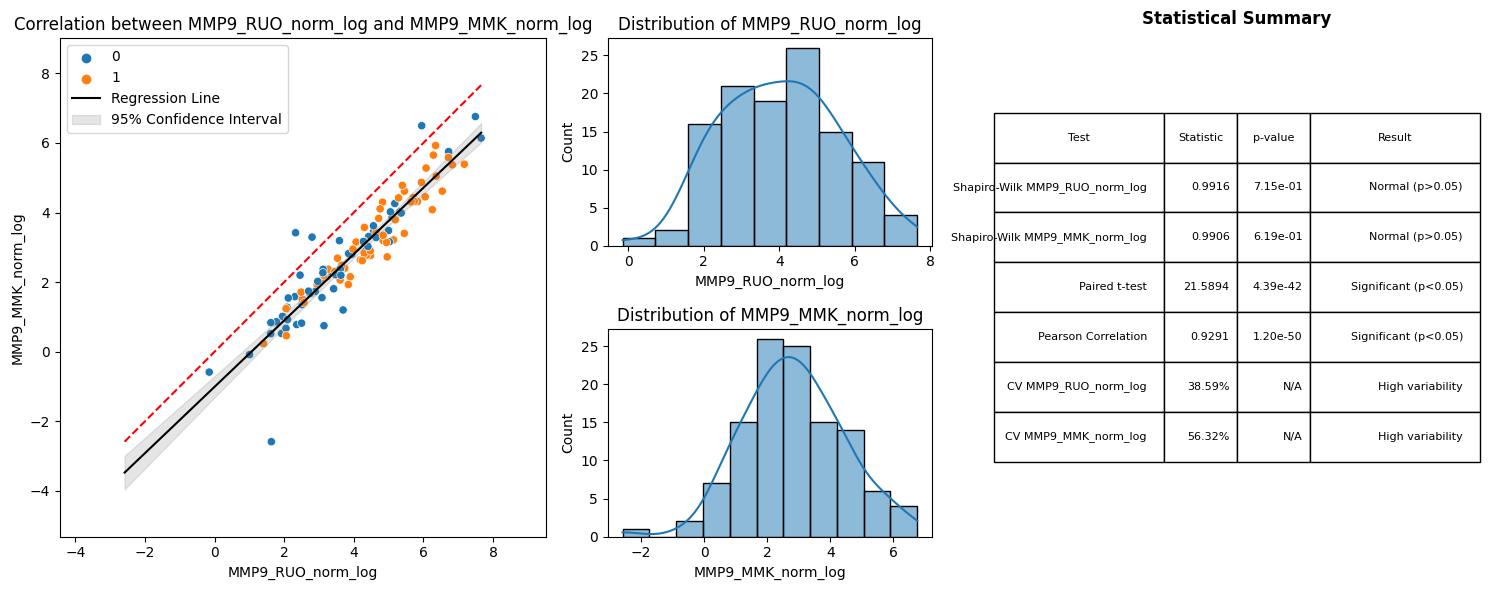

In [11]:
df_120['MMP9_RUO_norm'] = df_120['MMP9_RUO'].div(df_120['Total_protein_BCA'])
df_120['MMP9_RUO_norm_log'] = np.log(df_120['MMP9_RUO_norm'])
df_120['MMP9_MMK_norm'] = df_120['MMP9_MMK'].div(df_120['Total_protein_BCA'])
df_120['MMP9_MMK_norm_log'] = np.log(df_120['MMP9_MMK_norm'])

# dropna and inf values for the norm_log columns
df_120 = df_120.replace([np.inf, -np.inf], np.nan)
utils.plot_biomarker_correlation(df_120.dropna(subset=['MMP9_RUO_norm_log', 'MMP9_MMK_norm_log']), "MMP9_RUO_norm_log", "MMP9_MMK_norm_log")

### PERM

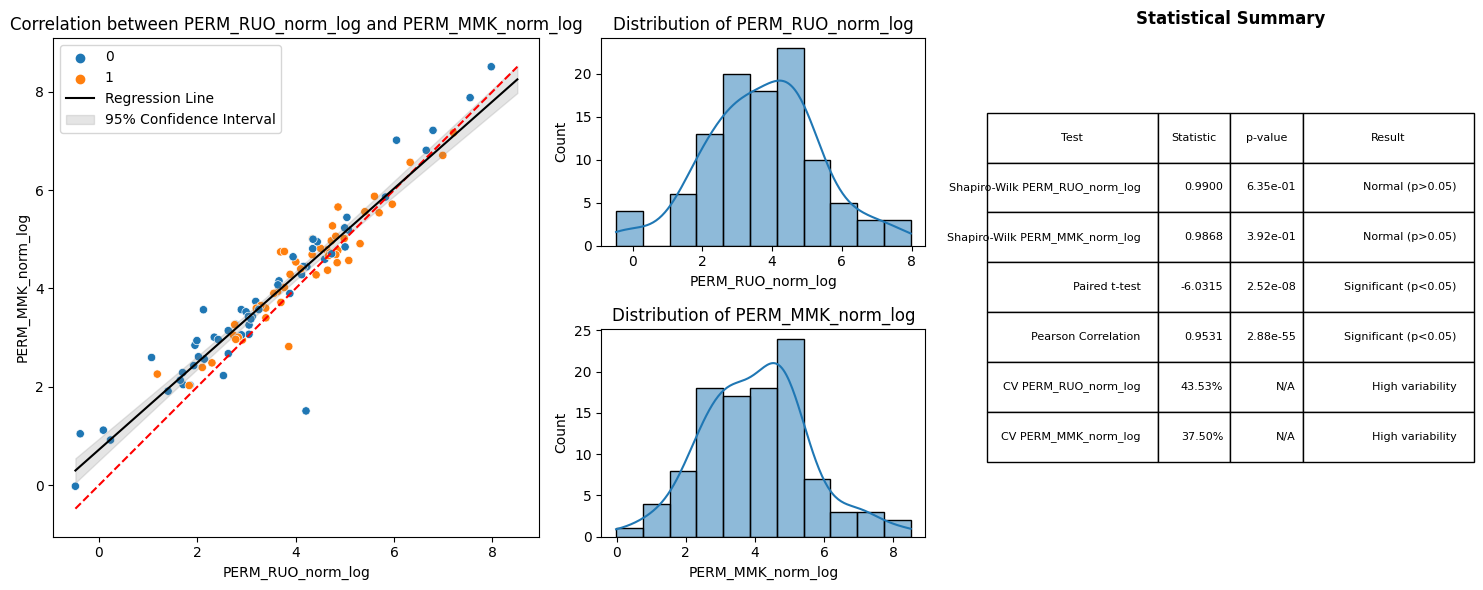

In [12]:
df_120['PERM_RUO_norm'] = df_120['PERM_RUO'].div(df_120['Total_protein_BCA'])
df_120['PERM_RUO_norm_log'] = np.log(df_120['PERM_RUO_norm'])
df_120['PERM_MMK_norm'] = df_120['PERM_MMK'].div(df_120['Total_protein_BCA'])
df_120['PERM_MMK_norm_log'] = np.log(df_120['PERM_MMK_norm'])

# dropna and inf values for the norm_log columns
df_120 = df_120.replace([np.inf, -np.inf], np.nan)
utils.plot_biomarker_correlation(df_120.dropna(subset=['PERM_RUO_norm_log', 'PERM_MMK_norm_log']), "PERM_RUO_norm_log", "PERM_MMK_norm_log")

# HSPB1

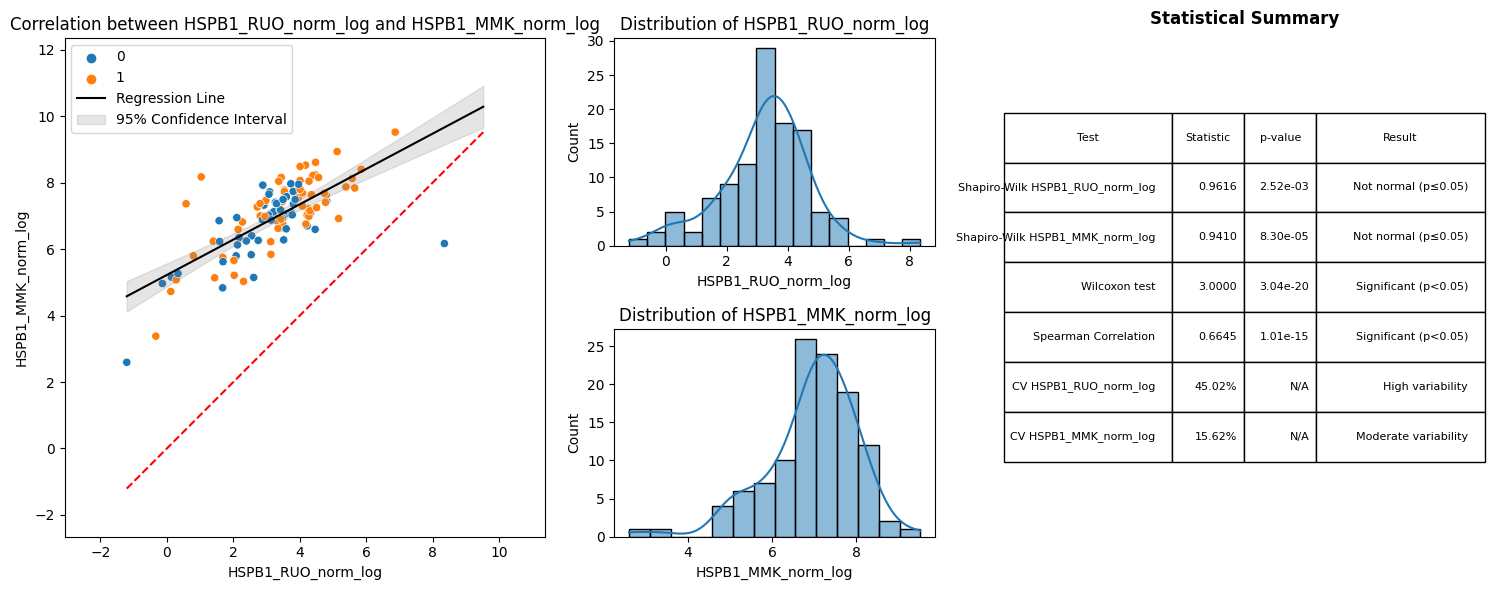

In [13]:
df_120['HSPB1_RUO_norm'] = df_120['HSPB1_RUO'].div(df_120['Total_protein_BCA'])
df_120['HSPB1_RUO_norm_log'] = np.log(df_120['HSPB1_RUO_norm'])
df_120['HSPB1_MMK_norm'] = df_120['HSPB1_MMK'].div(df_120['Total_protein_BCA'])
df_120['HSPB1_MMK_norm_log'] = np.log(df_120['HSPB1_MMK_norm'])

# dropna and inf values for the norm_log columns
df_120 = df_120.replace([np.inf, -np.inf], np.nan)
utils.plot_biomarker_correlation(df_120.dropna(subset=['HSPB1_RUO_norm_log', 'HSPB1_MMK_norm_log']), "HSPB1_RUO_norm_log", "HSPB1_MMK_norm_log")

# 60x60 (enlarged) Model computing

In [26]:
df_120_enl = pd.read_csv('../../../data/60x60_enlarged_20240926.csv' , sep='\t', index_col=0, header=0)

# Harmonization of column names
df_120_enl = utils.normalize_column_names(df_120_enl)

# Ensure numeric columns are treated as such
cols_120_to_num = ['Collected_volume_mL', 'pH',
                    'MMP9_MMK', 'HSPB1_MMK', 'AGRIN_MMK',
                    'KPYM_MMK', 'PERM_MMK',
                    'Total_protein_BCA']
df_120_enl = utils.cols_as_numbers(df_120_enl, cols_120_to_num)

# Ensure categorical columns are treated as such
df_120_enl = utils.cols_as_category(df_120_enl, {'Pathology':{'Benign': 0, 'Endometrial cancer': 1}})

In [27]:
PLOT_ROCS = True
MAX_BIOMARKER_COUNT = 1
RESULTS_PATH = './results/60x60_enl'

# Columns to be considered as biomarkers
BIOMARKERS_120_enl = ['MMP9_MMK', 'HSPB1_MMK', 'AGRIN_MMK', 'KPYM_MMK', 'PERM_MMK']

NORMALIZING_COL_120_enl = 'Total_protein_BCA' # Column to be used for normalizing the biomarkers
VOLUME_COL_enl = 'Collected_volume_mL' # Column to be used as volume for scatters and undoing the dilution

METHODS = ['direct', 'normalized', 'kronmal', 'undo_dilution']

In [28]:
models_120_enl_1 = utils.compute_all_models_and_save(
                            df=df_120_enl,
                            biomarkers=BIOMARKERS_120_enl,
                            normalizing_col=NORMALIZING_COL_120_enl, 
                            volume_col= VOLUME_COL_enl,
                            volume_added=0.5,
                            apply_log=True,
                            avoid_same_biomarker=True,
                            methods=METHODS,
                            max_biomarker_count=MAX_BIOMARKER_COUNT,
                            folder_name=RESULTS_PATH,
                            plot_rocs=PLOT_ROCS,
                            compute_auc_ci=True
                            )

# Models performance (60x60 enlarged)

## Direct

In [29]:
pd.read_csv(f'{RESULTS_PATH}/direct/max_1.csv', sep=',', index_col=0, header=0).sort_values(by='AUC', ascending=False)

,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,
AGRIN_MMK,0.82038,0.76316,0.71053,0.75000,0.72500,0.56566
PERM_MMK,0.81846,0.85135,0.65789,0.81967,0.70787,0.55556
MMP9_MMK,0.80783,0.71053,0.81579,0.73810,0.79412,0.58586
KPYM_MMK,0.80754,0.86667,0.61842,0.82456,0.69149,0.56566
HSPB1_MMK,0.75614,0.64474,0.69333,0.65823,0.68056,0.54545


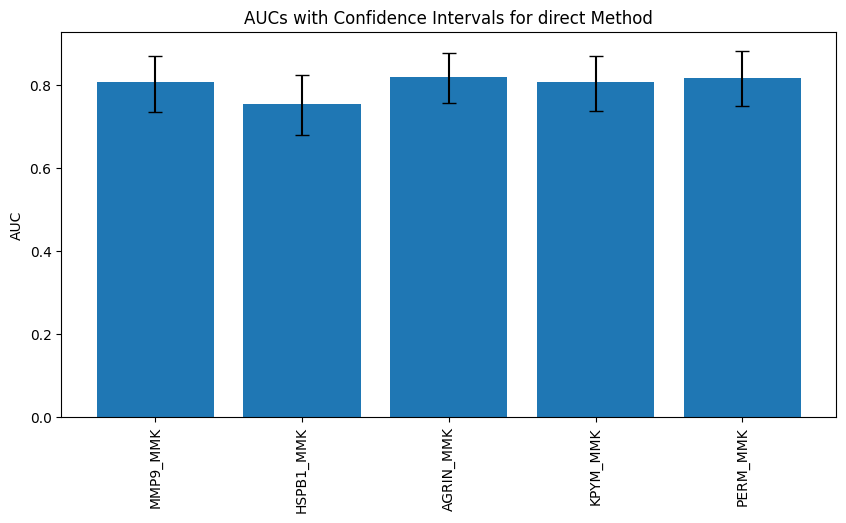

In [48]:
utils.plot_aucs_with_confidence_intervals(models_120_enl_1, 'direct')

## Normalized

In [30]:
pd.read_csv(f'{RESULTS_PATH}/normalized/max_1.csv', sep=',', index_col=0, header=0).sort_values(by='AUC', ascending=False)

,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,
AGRIN_MMK,0.76039,0.55263,0.90789,0.66990,0.85714,0.55556
KPYM_MMK,0.74333,0.77333,0.60526,0.73016,0.65909,0.55556
MMP9_MMK,0.66949,0.71053,0.56579,0.66154,0.62069,0.54545
PERM_MMK,0.66572,0.66216,0.59211,0.64286,0.61250,0.53535
HSPB1_MMK,0.64737,0.76316,0.38667,0.61702,0.55769,0.52525


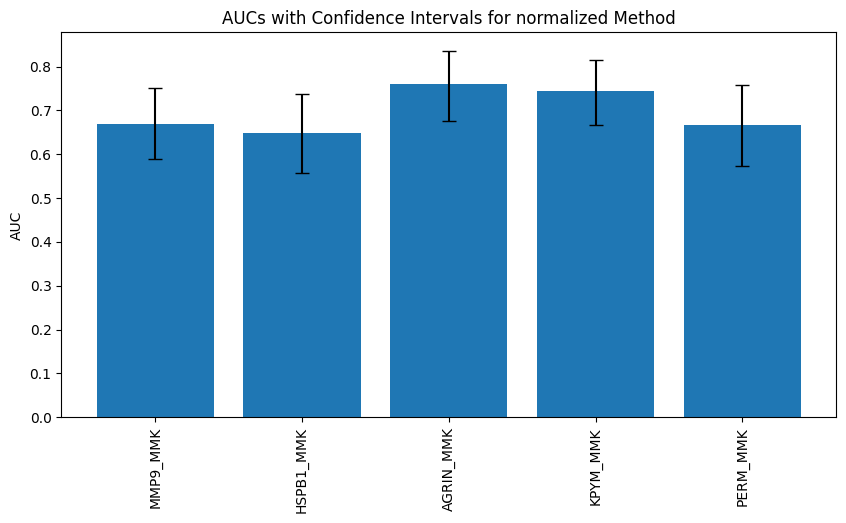

In [47]:
utils.plot_aucs_with_confidence_intervals(models_120_enl_1, 'normalized')

## Kronmal

In [31]:
pd.read_csv(f'{RESULTS_PATH}/kronmal/max_1.csv', sep=',', index_col=0, header=0).sort_values(by='AUC', ascending=False)

,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,
AGRIN_MMK,0.77943,0.61842,0.81579,0.68132,0.77049,0.57576
KPYM_MMK,0.75316,0.66667,0.71053,0.68354,0.69444,0.57576
MMP9_MMK,0.70914,0.77632,0.51316,0.69643,0.61458,0.56566
PERM_MMK,0.69950,0.75676,0.57895,0.70968,0.63636,0.55556
HSPB1_MMK,0.62772,0.55263,0.73333,0.61798,0.67742,0.56566


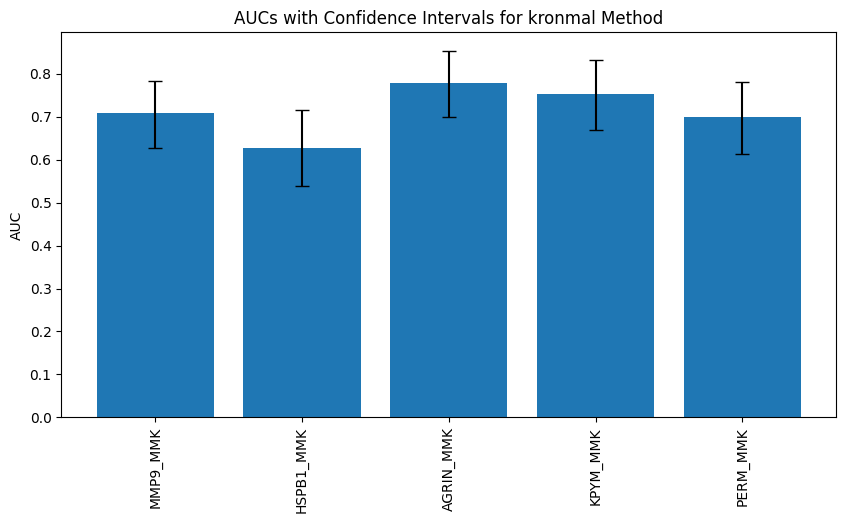

In [46]:
utils.plot_aucs_with_confidence_intervals(models_120_enl_1, 'kronmal')

# Undo dilution

In [32]:
pd.read_csv(f'{RESULTS_PATH}/undo_dilution/max_1.csv', sep=',', index_col=0, header=0).sort_values(by='AUC', ascending=False)

,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,
PERM_MMK,0.84624,0.81690,0.80556,0.81690,0.80556,0.59596
AGRIN_MMK,0.83790,0.69863,0.84722,0.73494,0.82258,0.61616
KPYM_MMK,0.83603,0.86111,0.76389,0.84615,0.78481,0.59596
MMP9_MMK,0.82154,0.78082,0.79167,0.78082,0.79167,0.61616
HSPB1_MMK,0.79896,0.78082,0.64789,0.74194,0.69512,0.56566


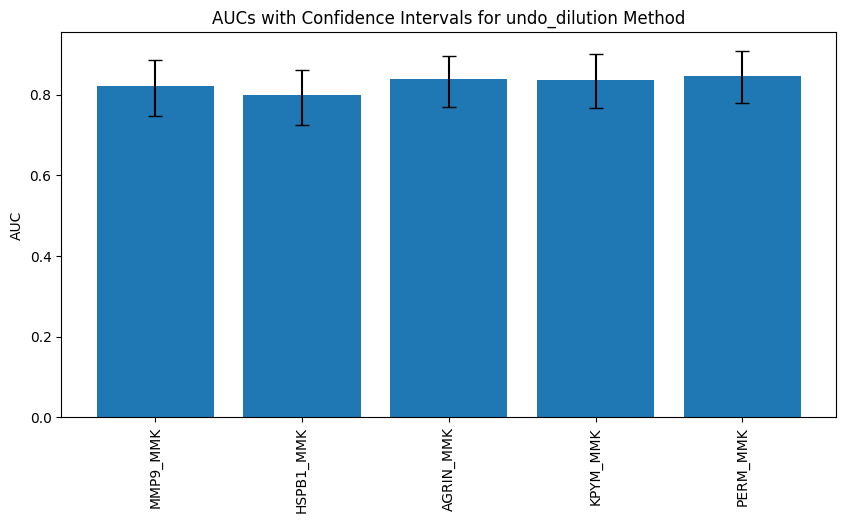

In [45]:
utils.plot_aucs_with_confidence_intervals(models_120_enl_1, 'undo_dilution')

# Biomarkers & Total Protein vs Collected Volume

# Direct

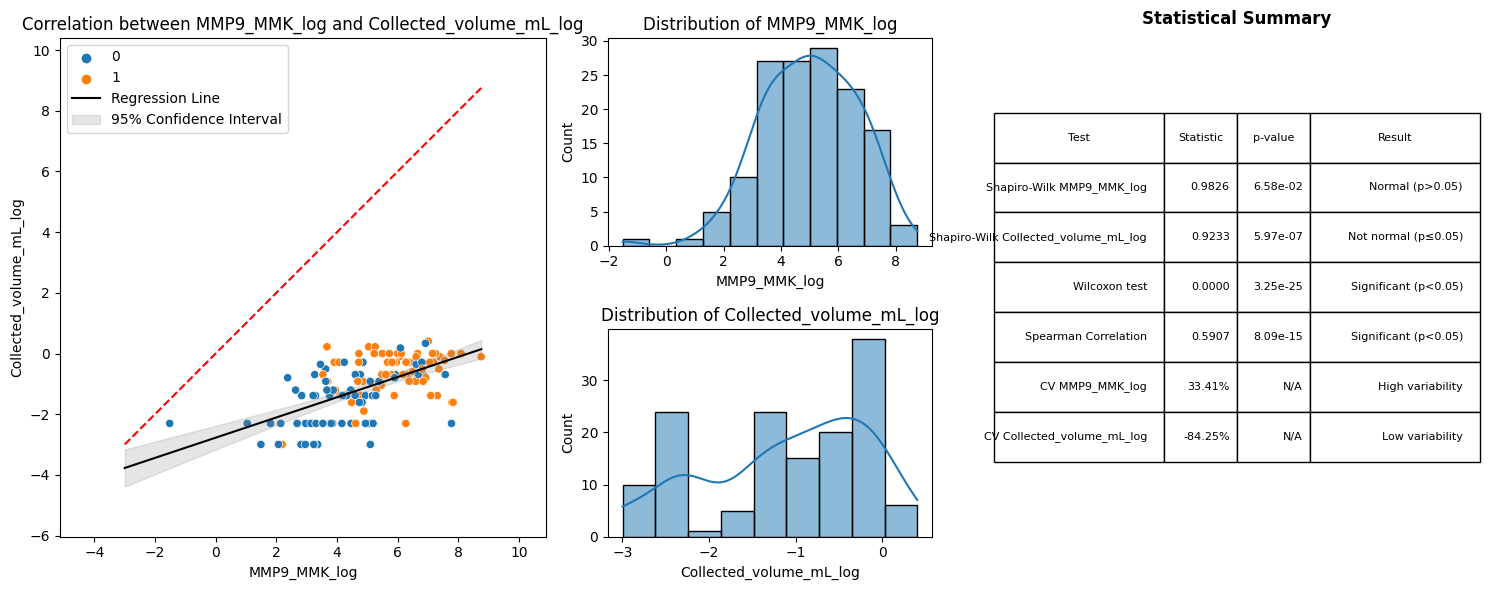

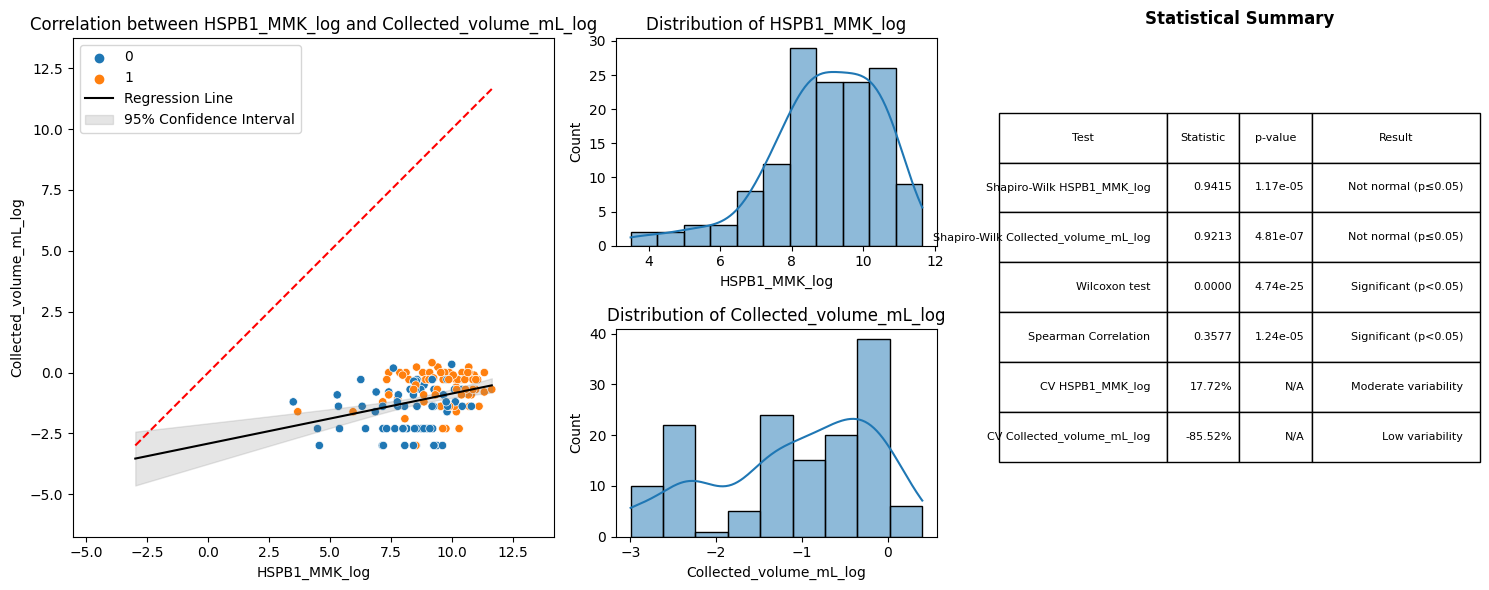

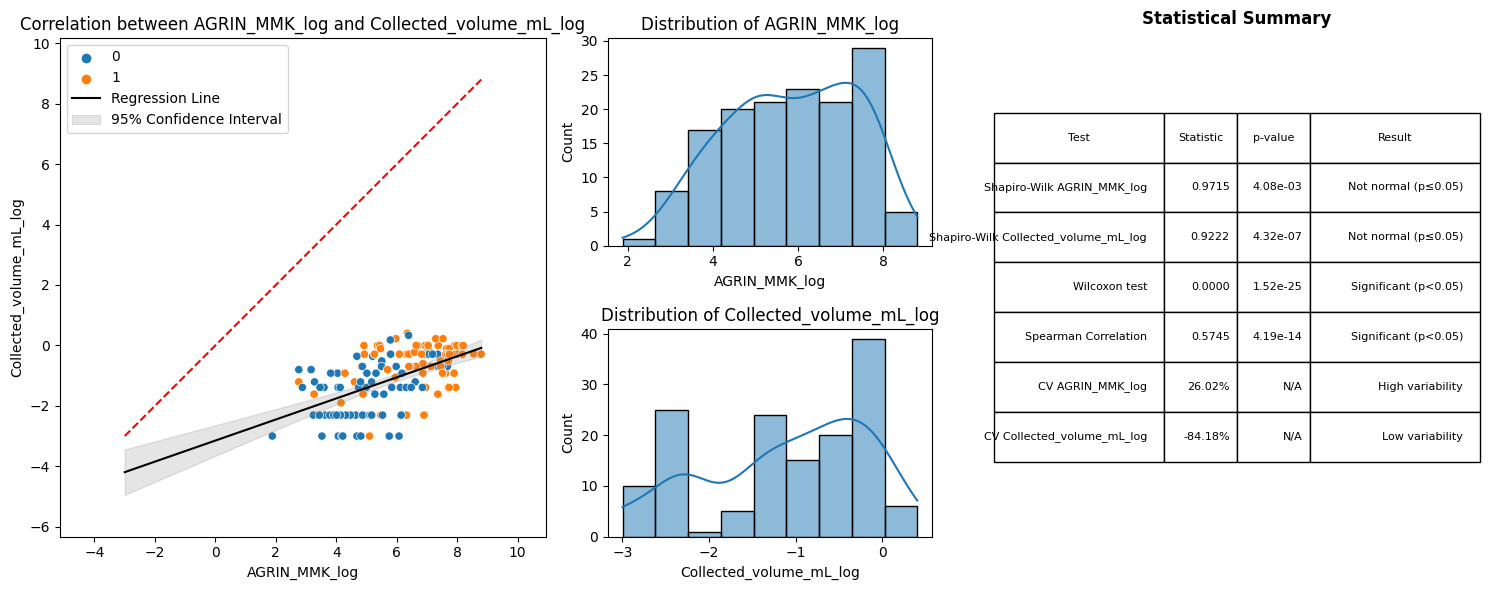

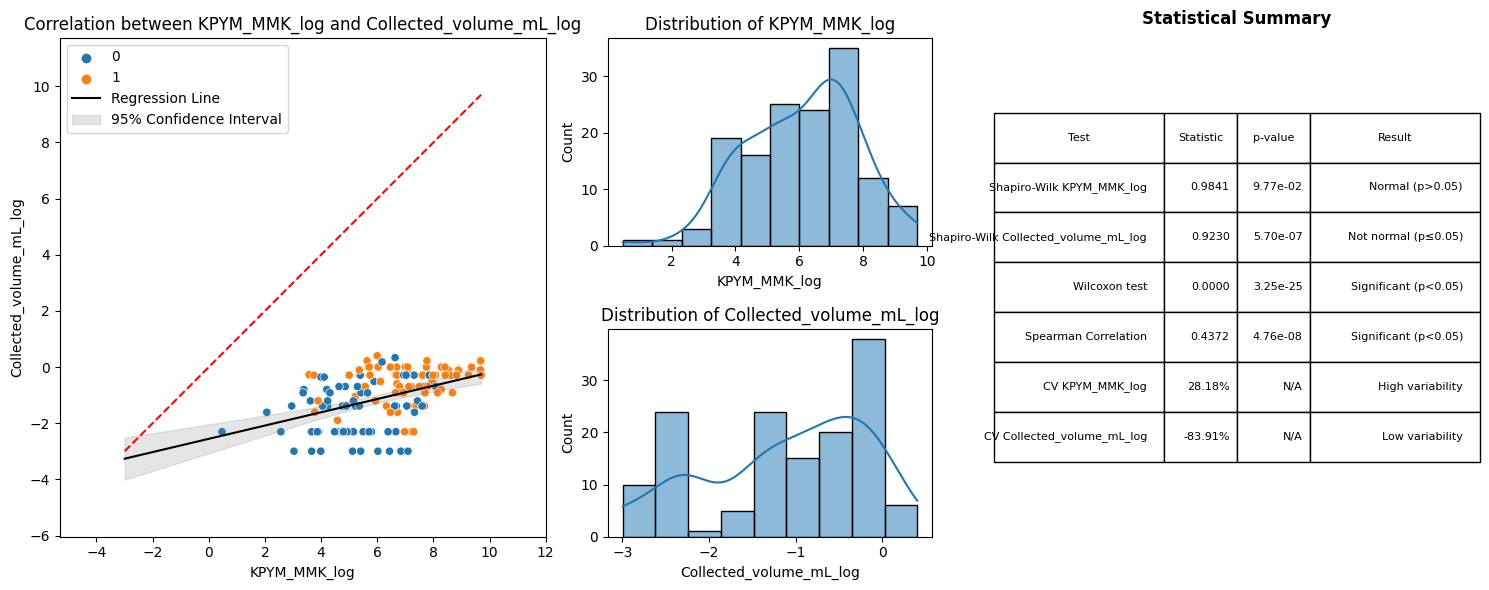

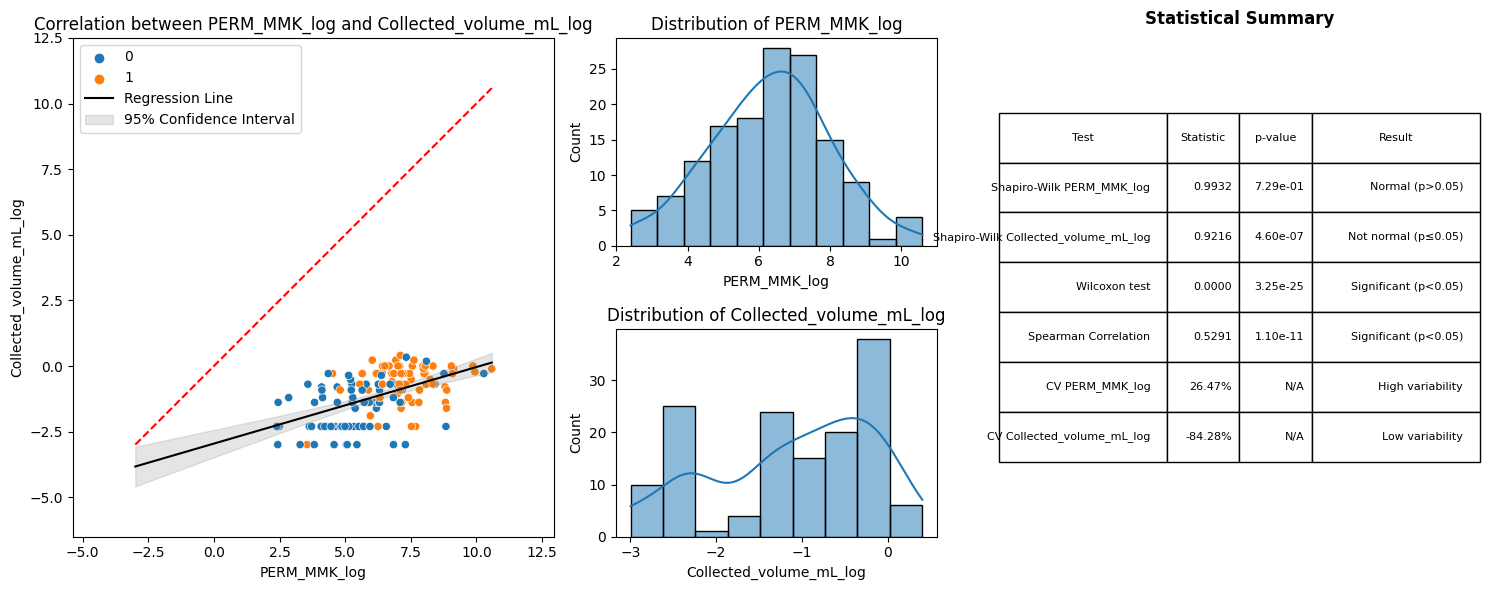

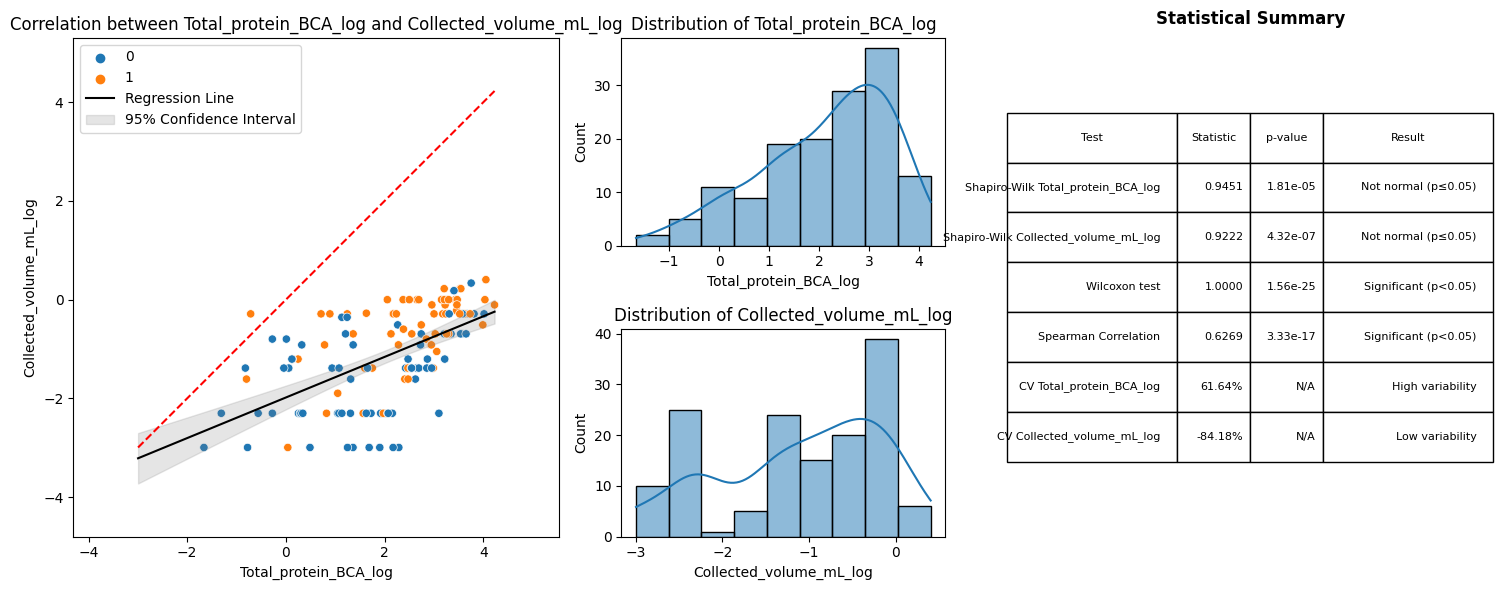

In [40]:
df_120_enl['Collected_volume_mL_log'] = np.log(df_120_enl['Collected_volume_mL'])
for bmk in BIOMARKERS_120_enl+['Total_protein_BCA']:
    df_120_enl[f'{bmk}_log'] = np.log(df_120_enl[bmk])
    df_120_enl = df_120_enl.replace([np.inf, -np.inf], np.nan)
    utils.plot_biomarker_correlation(df_120_enl.dropna(subset=[ f'{bmk}_log', 'Collected_volume_mL_log']) , f'{bmk}_log', 'Collected_volume_mL_log')

## Normalized

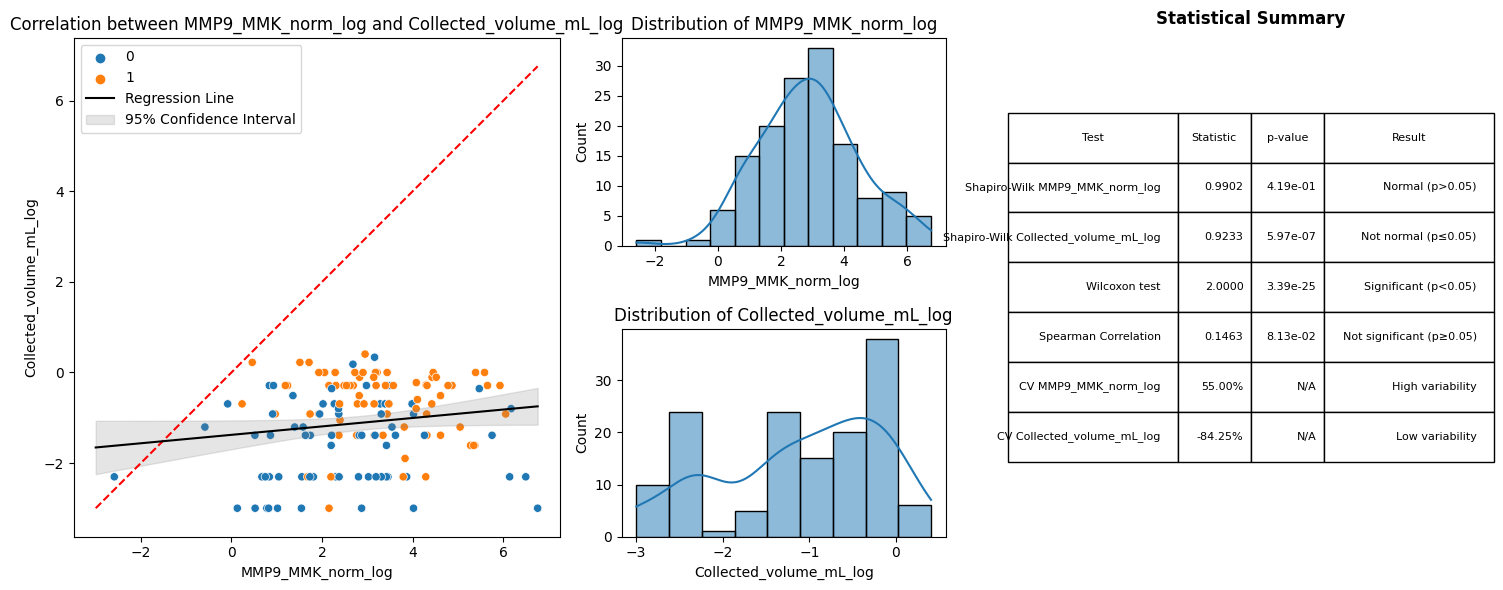

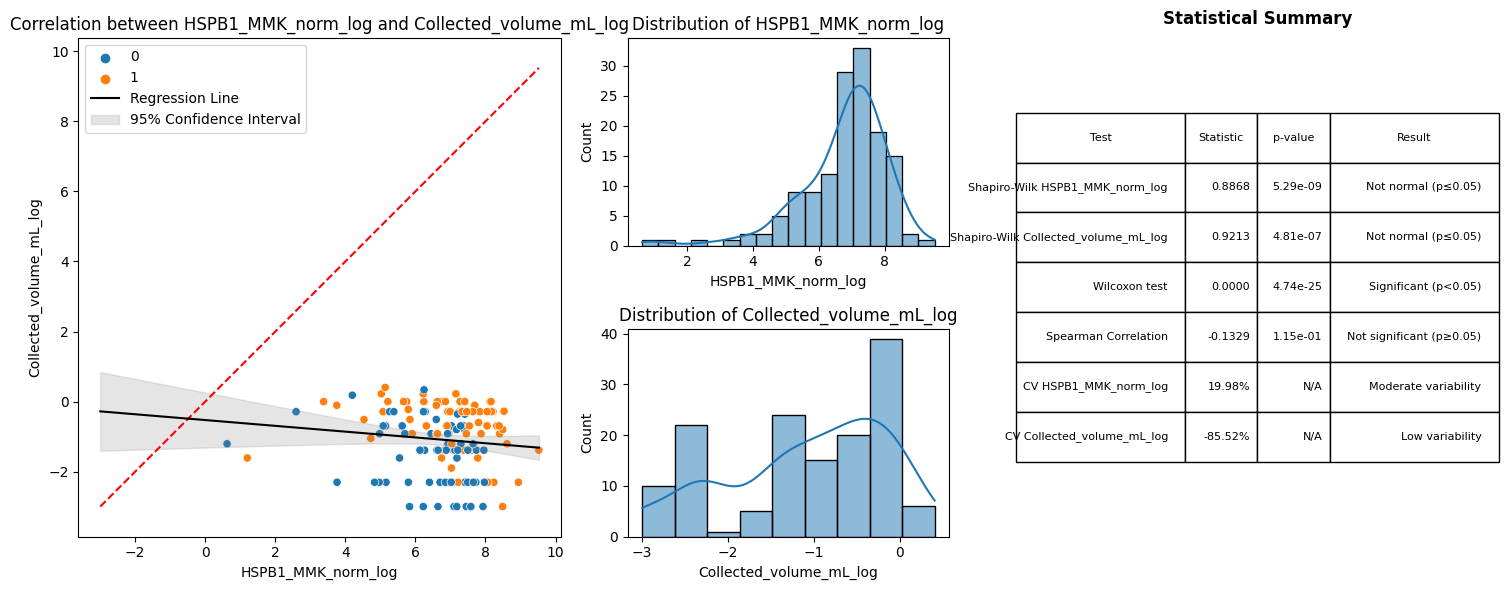

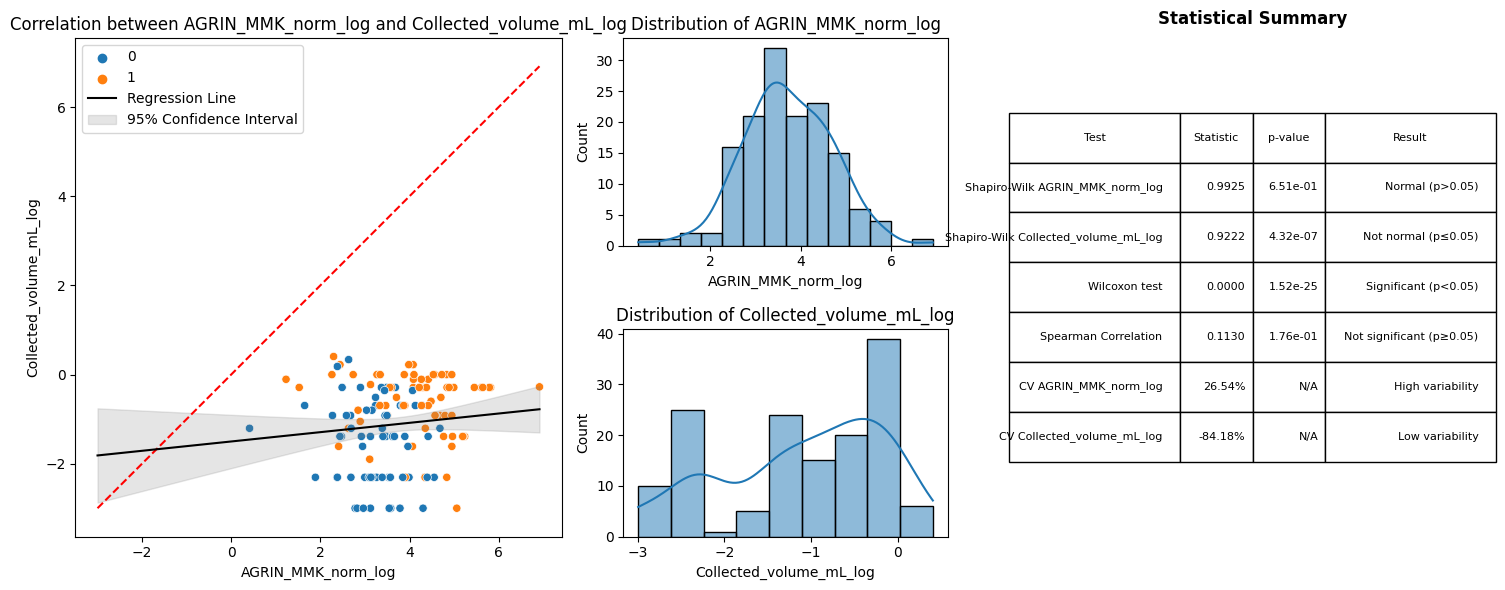

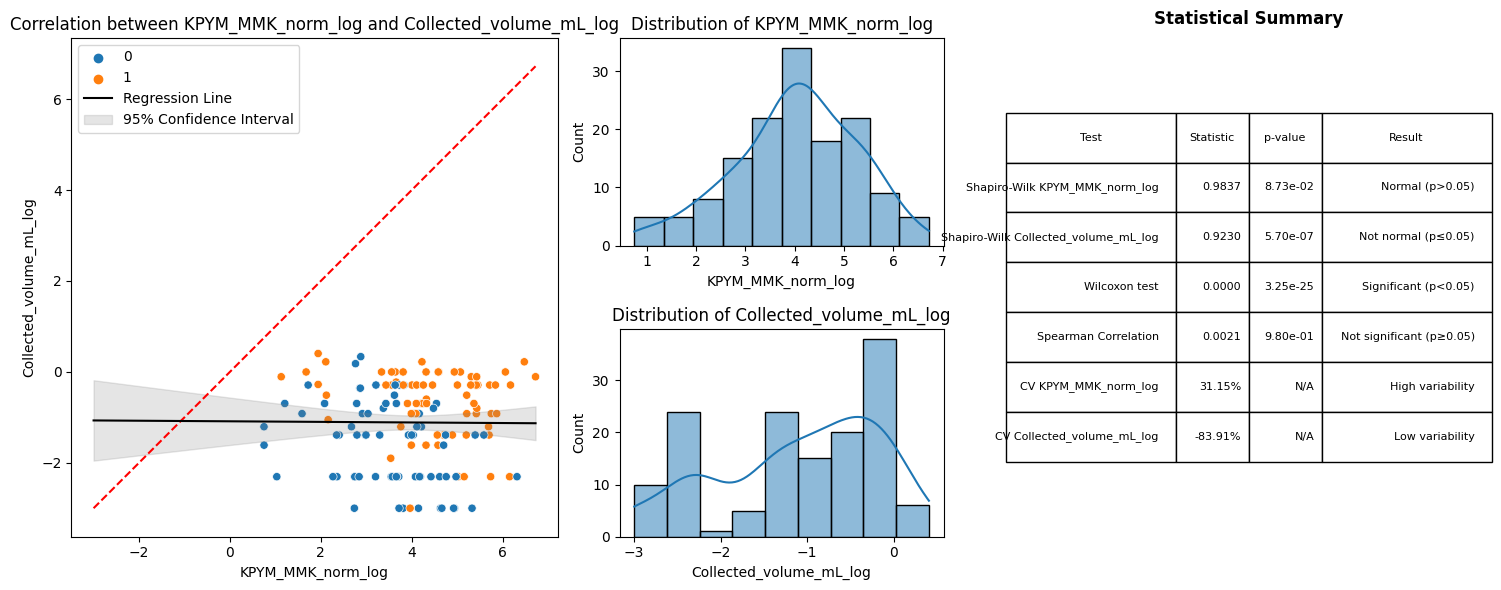

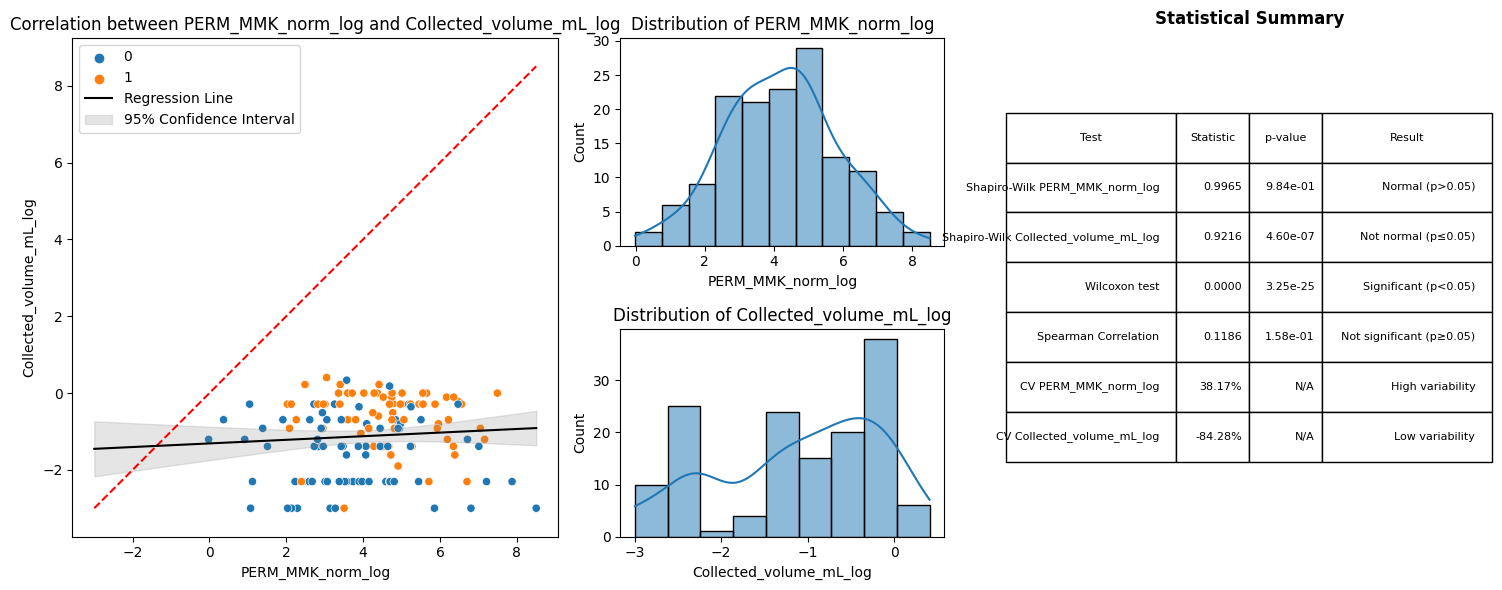

In [41]:
for bmk in BIOMARKERS_120_enl:
    df_120_enl[f'{bmk}_norm'] = df_120_enl[bmk].div(df_120_enl['Total_protein_BCA'])
    df_120_enl[f'{bmk}_norm_log'] = np.log(df_120_enl[f'{bmk}_norm'])
    df_120_enl = df_120_enl.replace([np.inf, -np.inf], np.nan)
    utils.plot_biomarker_correlation(df_120_enl.dropna(subset=[ f'{bmk}_norm_log', 'Collected_volume_mL_log']) , f'{bmk}_norm_log', 'Collected_volume_mL_log')